In [40]:
import pandas as pd
import numpy as np 
from collections import Counter
import re
from matplotlib import pyplot as plt
import json 
import nltk 
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('wordnet')
import vaderSentiment
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shikshya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
!pip install wordcloud

In [16]:
file = ".data/data.csv"

In [17]:
df = pd.read_csv(file,encoding="latin-1",header=None)
df .head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [18]:
df.columns = ["sentiment","tweet_id","date","query","username","text"]

In [22]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

In [26]:
def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub(r'@[^\s]+','',tweet)                              # Removes usernames
    tweet = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)   # Remove URLs
    tweet = re.sub(r"\d+"," ", str(tweet))                           # Removes all digits
    tweet = re.sub(r'&quot;'," ", tweet)                               # Remove (&quot;)
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
   # for word in tweet.split():
    #    if word.lower() in contractions:
     #       tweet = tweet.replace(word, contractions[word.lower()])   # Replaces contractions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space
    return tweet

In [27]:
df['processed_tweet'] = np.vectorize(process_tweet)(df['text'])
df.head()

,sentiment,tweet_id,date,query,username,text,processed_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",aww that bummer you shoulda got david carr of...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can update his facebook by te...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times for the ball managed to save...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it not behaving at all mad why am here bec...


In [28]:
tokenized_tweet = df['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [aww, that, bummer, you, shoulda, got, david, ...
1    [is, upset, that, he, can, update, his, facebo...
2    [dived, many, times, for, the, ball, managed, ...
3    [my, whole, body, feels, itchy, and, like, its...
4    [no, it, not, behaving, at, all, mad, why, am,...
Name: processed_tweet, dtype: object

In [29]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0    [aww, that, bummer, you, shoulda, got, david, ...
1    [is, upset, that, he, can, update, his, facebo...
2    [dived, many, time, for, the, ball, managed, t...
3    [my, whole, body, feel, itchy, and, like, it, ...
4    [no, it, not, behaving, at, all, mad, why, am,...
Name: processed_tweet, dtype: object

In [30]:
for i in range(len(tokenized_tweet)):
     tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
     #tokenized_tweet[i] = ' '.join([word for word in tokenized_tweet[i] if word not in stopwords])
df['processed_tweet'] = tokenized_tweet
df.head()

,sentiment,tweet_id,date,query,username,text,processed_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",aww that bummer you shoulda got david carr of ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can update his facebook by te...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many time for the ball managed to save t...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it not behaving at all mad why am here beca...


In [31]:
df=df[['text','processed_tweet']]
df

,text,processed_tweet
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",aww that bummer you shoulda got david carr of ...
1,is upset that he can't update his Facebook by ...,is upset that he can update his facebook by te...
2,@Kenichan I dived many times for the ball. Man...,dived many time for the ball managed to save t...
3,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire
4,"@nationwideclass no, it's not behaving at all....",no it not behaving at all mad why am here beca...
...,...,...
1048571,My GrandMa is making Dinenr with my Mum,my grandma is making dinenr with my mum
1048572,Mid-morning snack time... A bowl of cheese noo...,mid morning snack time bowl of cheese noodle yum
1048573,@ShaDeLa same here say it like from the Termi...,same here say it like from the terminiator mov...
1048574,@DestinyHope92 im great thaanks wbuu?,im great thaanks wbuu


In [32]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)

df['neg'] = df['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df['neu'] = df['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df['pos'] = df['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df['compound'] = df['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df[['processed_tweet','neg','pos','compound']].head()

In [34]:
def getAnalysis(score):
    if score < 0:
      return 'negative'
    elif score == 0:
      return 'neutral'
    else:
      return 'positive'

df['sentiment'] = df['compound'].apply(getAnalysis)
# Show the dataframe
df[['processed_tweet','neg','pos','compound','sentiment']].head()

,processed_tweet,neg,pos,compound,sentiment
0,aww that bummer you shoulda got david carr of ...,0.167,0.000,-0.3818,negative
1,is upset that he can update his facebook by te...,0.295,0.000,-0.7269,negative
2,dived many time for the ball managed to save t...,0.000,0.186,0.4939,positive
3,my whole body feel itchy and like it on fire,0.321,0.179,-0.2500,negative
4,no it not behaving at all mad why am here beca...,0.265,0.000,-0.6597,negative


In [35]:
slices = [(df['sentiment'] == 'negative').sum(), (df['sentiment'] == 'positive').sum(), (df['sentiment'] == 'neutral').sum()]
slices

[np.int64(360660), np.int64(443720), np.int64(244196)]

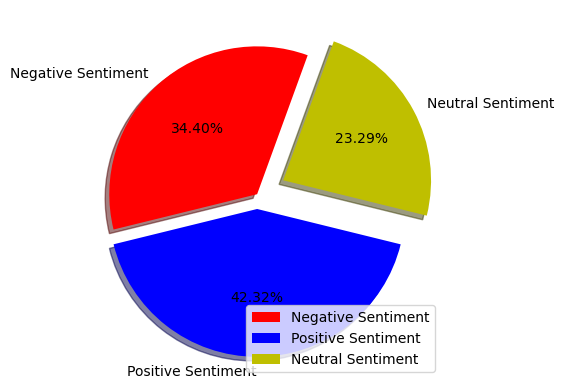

In [36]:
sentiments = ['Negative Sentiment','Positive Sentiment', 'Neutral Sentiment']
slices = [(df['sentiment'] == 'negative').sum(), (df['sentiment'] == 'positive').sum(), (df['sentiment'] == 'neutral').sum()]
colors = ['r','b','y']
plt.pie(slices, labels = sentiments, colors=colors, startangle=70, shadow = True,
        explode = (0, 0.1,0.2), radius = 1, autopct = '%1.2f%%')
plt.legend(loc = "lower right")
plt.show()

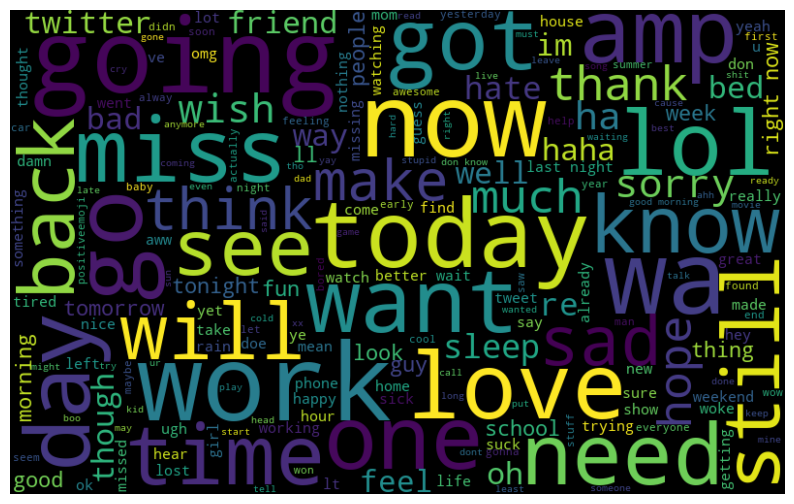

In [41]:
all_words = ' '.join([text for text in df['processed_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
n_class = 3
n_tweet = 500

if n_class == 2:
    df_pos = df.copy()[df.sentiment == 'positive'][:n_tweet]
    df_neg = df.copy()[df.sentiment == 'negative'][:n_tweet]
    df_neu = pd.DataFrame()
    df = pd.concat([df_pos, df_neg], ignore_index=True).reset_index(drop=True)
elif n_class == 3:
    df_pos = df.copy()[df.sentiment == 'positive'][:n_tweet]
    df_neg = df.copy()[df.sentiment == 'negative'][:n_tweet]
    df_neu = df.copy()[df.sentiment == 'neutral'][:n_tweet]
    df = pd.concat([df_pos, df_neg, df_neu], ignore_index=True).reset_index(drop=True)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data['processed_tweet'], data['sentiment'], test_size=0.33, random_state=0)

df_train = pd.DataFrame()
df_test = pd.DataFrame()

df_train['processed_tweet'] = X_train
df_train['sentiment'] = y_train
df_train = df_train.reset_index(drop=True)

df_test['processed_tweet'] = X_test
df_test['sentiment'] = y_test
df_test = df_test.reset_index(drop=True)
df_test

KeyError: 'processed_tweet'